# Profit Projections using Monte Carlo Simulation

A Monte Carlo simulation replaces a fixed model parameter with a random variable from a probability distribution (the normal distribution is a good baseline). Including this uncertainty in the model enables us to measure the uncertainty or risk in the output.

The aim of this project is to use a Monte Carlo simulation to forecast future profits for a generalized business. The model output will be a distribution of profit projections, along with a 95% confidence interval.


In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

We'll start by looking at profit projections for a particular product. Let's collect the expenses, unit pricing, sales forecast from last year's data, and the standard deviation in sales from annual historical data.


In [34]:
# $ units
expenses_fixed = 50000
expenses_variable = 45
unit_price = 140

# number of units
sales_forecast = 590
sales_std = 68

Next let's run the Monte Carlo simulation. We'll assume a normal distribution for number of sales.


In [35]:
samples = 10000
sales = np.random.default_rng(seed=42).normal(
    sales_forecast, sales_std, samples)
profit = sales * unit_price - expenses_fixed - expenses_variable * sales

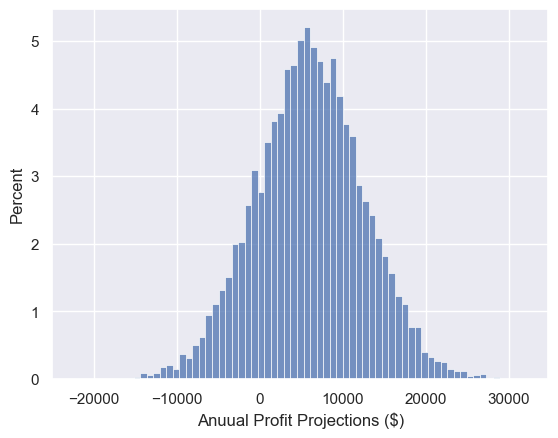

In [36]:
# sns.histplot(data=sales, stat='percent')
# plt.xlabel('Anuual Sales Projections ($)')
# plt.show()

sns.histplot(data=profit, stat='percent')
plt.xlabel('Anuual Profit Projections ($)')
plt.show()

Now we'll build a 95% confidence interval around the model output.


In [37]:
mean = np.mean(profit)
std = np.std(profit)

# 95% confidence interval
min_profit = mean - 2 * std
max_profit = mean + 2 * std

print('95% Confidence Interval Projections (in $)')
print(f'Min profit: {min_profit:.0f}')
print(f'Max profit: {max_profit:.0f}')

95% Confidence Interval Projections (in $)
Min profit: -7017
Max profit: 18985


Let's visualize the 95% confidence interval on the projected profits distribution.


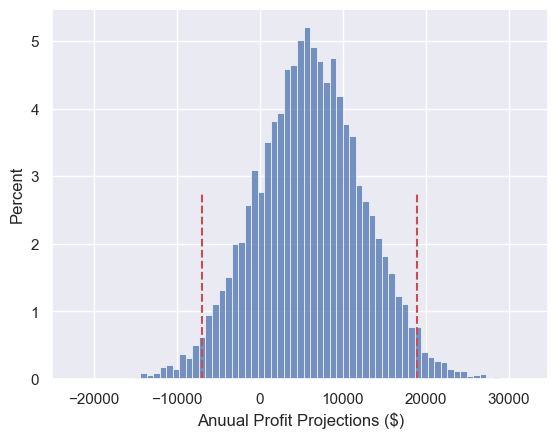

In [38]:
sns.histplot(data=profit, stat='percent')
plt.xlabel('Anuual Profit Projections ($)')
plt.axvline(min_profit, 0, 0.5, c='r', linestyle='--')
plt.axvline(max_profit, 0, 0.5, c='r', linestyle='--')
plt.show()

The computed confidence interval tells us that we can be 95% confident that the true projected profits will be between -$7,017 and $18,985. Given the potential for negative profits (losses), the model captures the level of moderate risk associated with this product's projected profits.
